🔍 Primeiras linhas do dataset:


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA



ℹ️ Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB

📈 Estatísticas descritivas:


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000



❓ Valores nulos por coluna:
total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


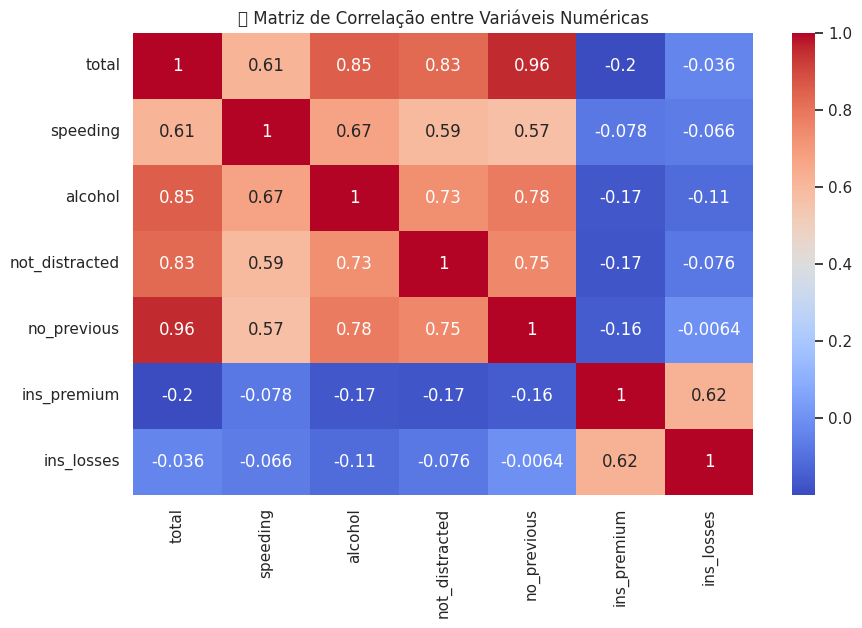

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


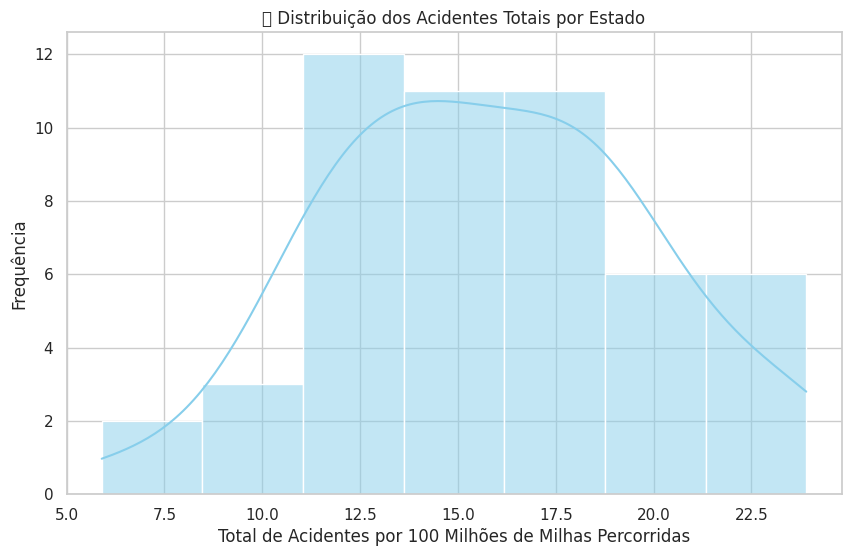

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


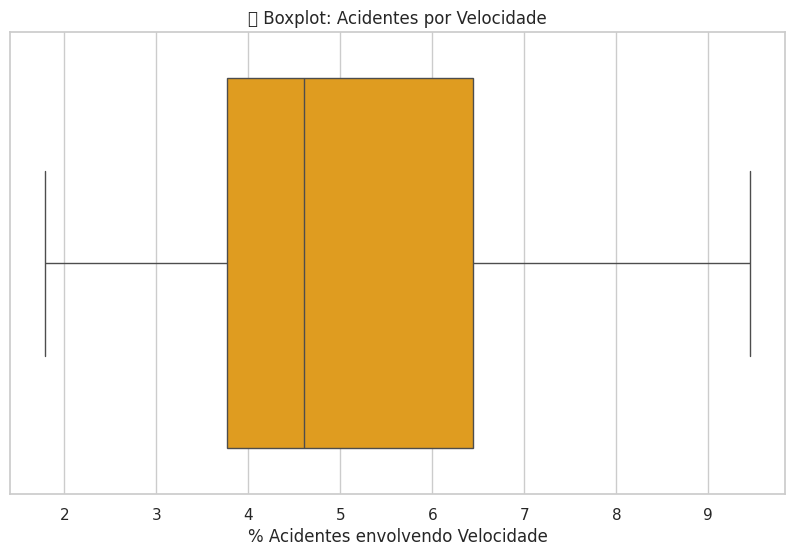

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


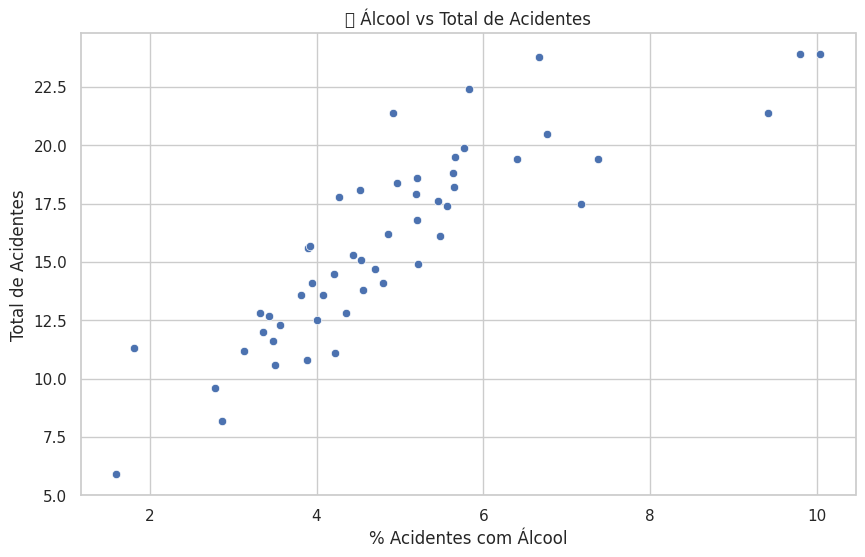

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127863 (\N{WINE GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


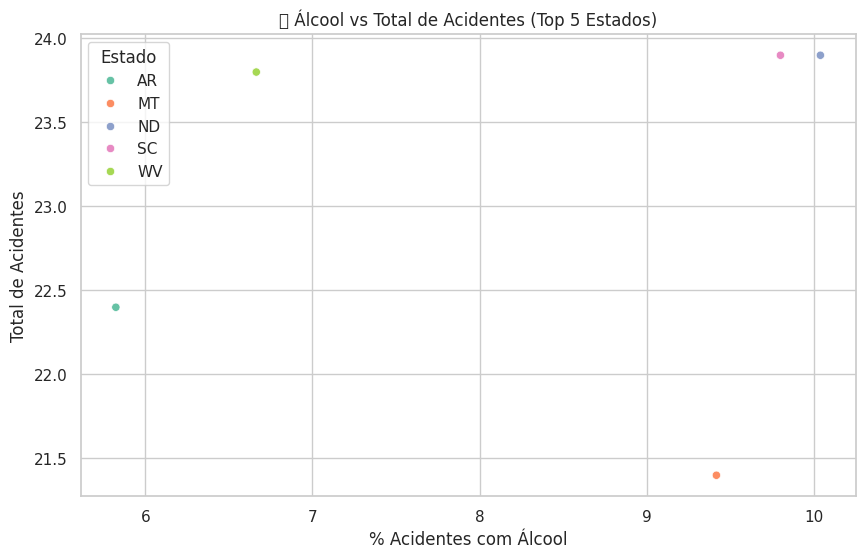


🏆 Tabela: Top 5 estados com maior total de acidentes:


,abbrev,total
34,ND,23.9
40,SC,23.9
48,WV,23.8
3,AR,22.4
26,MT,21.4


In [8]:
# 📊 Exploração Inicial do Dataset car_crashes (Seaborn)

# 1. Importação de bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo de gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 2. Carregamento do dataset
df = sns.load_dataset('car_crashes')

# 3. Visualização inicial
print("🔍 Primeiras linhas do dataset:")
display(df.head())

# 4. Informações gerais
print("\nℹ️ Informações do DataFrame:")
df.info()

print("\n📈 Estatísticas descritivas:")
display(df.describe())

# 5. Verificando valores nulos
print("\n❓ Valores nulos por coluna:")
print(df.isnull().sum())

# 6. Renomeando colunas para facilitar (opcional)
df.columns = df.columns.str.replace(' ', '_').str.lower()

# 7. Matriz de correlação (somente variáveis numéricas)
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("🔗 Matriz de Correlação entre Variáveis Numéricas")
plt.show()

# 8. Distribuição de acidentes totais
sns.histplot(df['total'], kde=True, color='skyblue')
plt.title('📊 Distribuição dos Acidentes Totais por Estado')
plt.xlabel('Total de Acidentes por 100 Milhões de Milhas Percorridas')
plt.ylabel('Frequência')
plt.show()

# 9. Boxplot: Acidentes relacionados à velocidade
sns.boxplot(x=df['speeding'], color='orange')
plt.title('📦 Boxplot: Acidentes por Velocidade')
plt.xlabel('% Acidentes envolvendo Velocidade')
plt.show()

# 10. Relação entre álcool e total de acidentes (sem hue)
sns.scatterplot(data=df, x='alcohol', y='total')
plt.title('🍷 Álcool vs Total de Acidentes')
plt.xlabel('% Acidentes com Álcool')
plt.ylabel('Total de Acidentes')
plt.show()

# Top 5 estados com maior total de acidentes
top_states = df.sort_values('total', ascending=False).head(5)['abbrev'].values
df_top = df[df['abbrev'].isin(top_states)]

sns.scatterplot(data=df_top, x='alcohol', y='total', hue='abbrev', palette='Set2')
plt.title('🍷 Álcool vs Total de Acidentes (Top 5 Estados)')
plt.xlabel('% Acidentes com Álcool')
plt.ylabel('Total de Acidentes')
plt.legend(title='Estado')
plt.show()

# 11. Tabela: Top 5 estados com maior total de acidentes
print("\n🏆 Tabela: Top 5 estados com maior total de acidentes:")
display(df[['abbrev', 'total']].sort_values('total', ascending=False).head())

